In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('.../MalwareAnalysis/PEFiles.csv', sep=',')

In [3]:
data.shape

(500, 65)

In [4]:
data.head()

,MD5Hash,FileType,SizeOfData,Malware,Machine,NumberOfSections,TimeDateStamp,PointerToSymbolTable,NumberOfSymbols,SizeOfOptionalHeader,...,SectionMaxChar,SectionMainChar,DirectoryEntryImport,DirectoryEntryImportSize,DirectoryEntryExport,ImageDirectoryEntryExport,ImageDirectoryEntryImport,ImageDirectoryEntryResource,ImageDirectoryEntryException,ImageDirectoryEntrySecurity
0,2c146bc8d73b8944f35506241b9953a9,Win32 DLL,21032,0,34404,7,1377169983,0.0,0.0,240.0,...,3.221226e+09,0.0,12.0,148.0,0.0,0.0,124160.0,131072.0,118784.0,121344.0
1,7a55e51d07e1f15221eb11479adbc53f,Win32 DLL,21024,0,332,3,1375749127,0.0,0.0,224.0,...,1.610613e+09,0.0,1.0,1.0,0.0,0.0,230810.0,237568.0,0.0,232448.0
2,f0c9c56f56ffa3adc548173569dbd793,Win32 DLL,20512,0,332,5,1377144200,0.0,0.0,224.0,...,3.221226e+09,0.0,8.0,164.0,368.0,692144.0,832176.0,839680.0,0.0,0.0
3,02d669afdabfe420598041b848b71158,Win32 DLL,20544,0,332,5,1377142602,0.0,0.0,224.0,...,3.221226e+09,0.0,7.0,74.0,4.0,23936.0,28996.0,32768.0,0.0,0.0
4,944a33d971704ff815a6c90733d0a72e,Win32 DLL,20520,0,332,5,1377142976,0.0,0.0,224.0,...,3.221226e+09,0.0,6.0,130.0,12.0,46768.0,53792.0,57344.0,0.0,0.0


In [5]:
data.isnull().sum()

MD5Hash                         0
FileType                        0
SizeOfData                      0
Malware                         0
Machine                         0
                               ..
ImageDirectoryEntryExport       2
ImageDirectoryEntryImport       2
ImageDirectoryEntryResource     2
ImageDirectoryEntryException    2
ImageDirectoryEntrySecurity     2
Length: 65, dtype: int64

In [6]:
data["Malware"].value_counts()

1    252
0    248
Name: Malware, dtype: int64

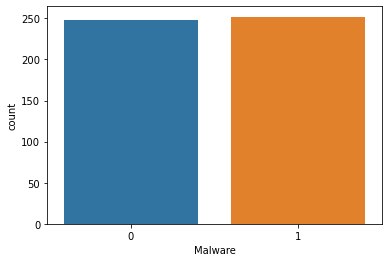

In [7]:
sns.countplot(data["Malware"])
plt.show()

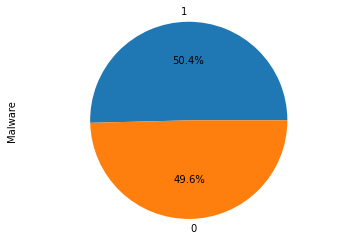

In [8]:
data["Malware"].value_counts().plot(kind="pie",autopct="%1.1f%%")
plt.axis("equal")
plt.show()

In [9]:
data["FileType"].value_counts()

Win32 EXE            223
Win32 DLL            188
unknown               21
DOS EXE               19
GIF                   11
MS Word Document       7
unknown                7
Windows Installer      6
DOS COM                6
Text                   5
HTML                   4
Email                  1
PDF                    1
ZIP                    1
Name: FileType, dtype: int64

In [10]:
data['FileType'] = data.FileType.map({'Win32 EXE':0, 'Win32 DLL':1, 'DOS EXE':2, 'GIF':3, 'MS Word Document':4, 'Windows Installer':5, 'DOS COM':6, 'Text':7, 'HTML':8, 'PDF':9, 'ZIP':10, 'Email':11, 'unknown':12})

In [11]:
Data=data.dropna(how="any",axis=0)
Data.head()

,MD5Hash,FileType,SizeOfData,Malware,Machine,NumberOfSections,TimeDateStamp,PointerToSymbolTable,NumberOfSymbols,SizeOfOptionalHeader,...,SectionMaxChar,SectionMainChar,DirectoryEntryImport,DirectoryEntryImportSize,DirectoryEntryExport,ImageDirectoryEntryExport,ImageDirectoryEntryImport,ImageDirectoryEntryResource,ImageDirectoryEntryException,ImageDirectoryEntrySecurity
0,2c146bc8d73b8944f35506241b9953a9,1.0,21032,0,34404,7,1377169983,0.0,0.0,240.0,...,3.221226e+09,0.0,12.0,148.0,0.0,0.0,124160.0,131072.0,118784.0,121344.0
1,7a55e51d07e1f15221eb11479adbc53f,1.0,21024,0,332,3,1375749127,0.0,0.0,224.0,...,1.610613e+09,0.0,1.0,1.0,0.0,0.0,230810.0,237568.0,0.0,232448.0
2,f0c9c56f56ffa3adc548173569dbd793,1.0,20512,0,332,5,1377144200,0.0,0.0,224.0,...,3.221226e+09,0.0,8.0,164.0,368.0,692144.0,832176.0,839680.0,0.0,0.0
3,02d669afdabfe420598041b848b71158,1.0,20544,0,332,5,1377142602,0.0,0.0,224.0,...,3.221226e+09,0.0,7.0,74.0,4.0,23936.0,28996.0,32768.0,0.0,0.0
4,944a33d971704ff815a6c90733d0a72e,1.0,20520,0,332,5,1377142976,0.0,0.0,224.0,...,3.221226e+09,0.0,6.0,130.0,12.0,46768.0,53792.0,57344.0,0.0,0.0


In [12]:
X = Data.drop(['MD5Hash','Malware'],axis=1)
Y = Data['Malware']

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test= train_test_split(X, Y, test_size=0.2, random_state=1)
X_train.head()

,FileType,SizeOfData,Machine,NumberOfSections,TimeDateStamp,PointerToSymbolTable,NumberOfSymbols,SizeOfOptionalHeader,Characteristics,Magic,...,SectionMaxChar,SectionMainChar,DirectoryEntryImport,DirectoryEntryImportSize,DirectoryEntryExport,ImageDirectoryEntryExport,ImageDirectoryEntryImport,ImageDirectoryEntryResource,ImageDirectoryEntryException,ImageDirectoryEntrySecurity
58,1.0,286248,332,4,1375748781,0.0,0.0,224.0,8450.0,267.0,...,3.758096e+09,0.0,0.0,0.0,0.0,0.0,0.0,118784.0,0.0,573952.0
376,0.0,396962,332,7,1363078305,0.0,0.0,224.0,258.0,267.0,...,3.221226e+09,0.0,3.0,41.0,0.0,0.0,13024.0,20480.0,0.0,306688.0
78,1.0,20008,332,5,950572552,0.0,0.0,224.0,271.0,267.0,...,3.221226e+09,0.0,5.0,169.0,0.0,0.0,81920.0,90112.0,0.0,0.0
444,12.0,364,332,5,1318438070,0.0,0.0,224.0,783.0,267.0,...,3.761242e+09,0.0,6.0,131.0,0.0,0.0,245760.0,0.0,0.0,0.0
249,0.0,65536,332,5,1365109591,0.0,0.0,224.0,258.0,267.0,...,3.791651e+09,0.0,16.0,311.0,0.0,0.0,262276.0,294912.0,0.0,346112.0


In [14]:
#Scaling the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_train)

In [15]:
#performing Gaussian Naive Bayes on the training data
from sklearn.naive_bayes import GaussianNB
gnb=GaussianNB()

In [16]:
gnb.fit(X_scaled, Y_train)

GaussianNB()

In [17]:
Y_pred=gnb.predict(X_test)

In [18]:
from sklearn import metrics 
print("Gaussian Naive Bayes model accuracy(in %):", metrics.accuracy_score(Y_test, Y_pred)*100)

Gaussian Naive Bayes model accuracy(in %): 50.505050505050505


In [19]:
#accuracy is quite low using Naive Bayes algorithm.
#creating new dataframe to implement Random Forest Classifier
X_new = pd.DataFrame(X_scaled, columns=X.columns)
X_new.head()

,FileType,SizeOfData,Machine,NumberOfSections,TimeDateStamp,PointerToSymbolTable,NumberOfSymbols,SizeOfOptionalHeader,Characteristics,Magic,...,SectionMaxChar,SectionMainChar,DirectoryEntryImport,DirectoryEntryImportSize,DirectoryEntryExport,ImageDirectoryEntryExport,ImageDirectoryEntryImport,ImageDirectoryEntryResource,ImageDirectoryEntryException,ImageDirectoryEntrySecurity
0,-0.163516,-0.044945,-0.541968,-0.570036,0.163560,-0.050901,-0.069926,-0.541968,0.291239,-0.541968,...,1.067323,0.0,-0.880964,-0.739841,-0.157365,-0.229664,-0.439246,-0.296417,-0.196876,-0.040976
1,-0.525655,0.022689,-0.541968,1.256564,0.112775,-0.050901,-0.069926,-0.541968,-0.740340,-0.541968,...,0.250032,0.0,-0.535281,-0.454507,-0.157365,-0.229664,-0.420585,-0.407428,-0.196876,-0.073749
2,-0.163516,-0.207587,-0.541968,0.038831,-1.540616,-0.050901,-0.069926,-0.541968,-0.738703,-0.541968,...,0.250032,0.0,-0.304825,0.436292,-0.157365,-0.229664,-0.321869,-0.328795,-0.196876,-0.111355
3,3.820004,-0.219588,-0.541968,0.038831,-0.066151,-0.050901,-0.069926,-0.541968,-0.674229,-0.541968,...,1.072112,0.0,-0.189597,0.171836,-0.157365,-0.229664,-0.087115,-0.430555,-0.196876,-0.111355
4,-0.525655,-0.179775,-0.541968,0.038831,0.120916,-0.050901,-0.069926,-0.541968,-0.740340,-0.541968,...,1.118404,0.0,0.962682,1.424522,-0.157365,-0.229664,-0.063450,-0.097523,-0.196876,-0.068915


In [20]:
#using Principal Component Analysis to increase interpretability
from sklearn.decomposition import PCA
skpca = PCA(n_components=63)
X_pca = skpca.fit_transform(X_new)
print('Variance sum : ', skpca.explained_variance_ratio_.cumsum()[-1])

Variance sum :  1.0000000000000002


In [21]:
from sklearn.ensemble import RandomForestClassifier as RFC
from sklearn.metrics import classification_report, confusion_matrix

In [22]:
model = RFC(n_estimators=100, random_state=0, 
                         oob_score = True,
                         max_depth = 16, 
                         max_features = 'sqrt')
model.fit(X_pca, Y_train)

X_test_scaled = scaler.transform(X_test)
X_test_new = pd.DataFrame(X_test_scaled, columns=X.columns)
X_test_pca = skpca.transform(X_test_new)

Y_pred = model.predict(X_test_pca)
print(classification_report(Y_pred, Y_test))

              precision    recall  f1-score   support

           0       0.95      0.98      0.96        42
           1       0.98      0.96      0.97        57

    accuracy                           0.97        99
   macro avg       0.97      0.97      0.97        99
weighted avg       0.97      0.97      0.97        99



In [23]:
print("Random Forest model accuracy(in %):", metrics.accuracy_score(Y_test, Y_pred)*100)

Random Forest model accuracy(in %): 96.96969696969697


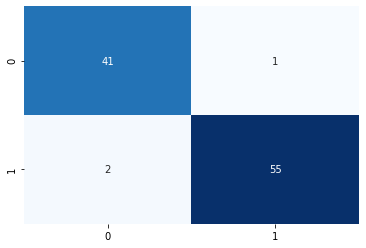

In [24]:
sns.heatmap(confusion_matrix(Y_pred, Y_test), annot=True, fmt="d", cmap=plt.cm.Blues, cbar=False)

In [25]:
#accuracy of 97% is obtained using Random Forest Classifier
#trying DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
clf = DecisionTreeClassifier()
clf = clf.fit(X_scaled,Y_train)
Y_pred = clf.predict(X_test)
print("Accuracy:",metrics.accuracy_score(Y_test, Y_pred)*100)

Accuracy: 100.0


In [26]:
print("Decision Tree Classifier accuracy(in %):", metrics.accuracy_score(Y_test, Y_pred)*100)

Decision Tree Classifier accuracy(in %): 100.0


In [27]:
#accuracy of 100% is obtained somehow?
#using Linear SVC Classifier
#scaling initial data again
X_scaled=scaler.fit_transform(X)
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_predict

svm=SVC(kernel="linear")
Y_pred = cross_val_predict(svm, X_scaled, Y, cv=10)
conf_mat = confusion_matrix(Y, Y_pred)
print(conf_mat)

[[248   0]
 [  0 243]]


In [28]:
print("Linear SVC Classifier accuracy(in %):", metrics.accuracy_score(Y, Y_pred)*100)

Linear SVC Classifier accuracy(in %): 100.0
